# Overview
- Library Installation
- Dataset - histograms of wet tank air pressures from buses
- Anomaly Detection with COSMO method
- Reviewing anomaly scores with repair events

# Installing required libraries

Let's start by installing required libraries.

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os, math



# Dataset

We start by loading the dataset.

In [2]:
df_hist=pd.read_csv('../data/lab1_example_data.csv')

In [4]:
df_hist.head(5)

,id,t,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,...,bin_50,bin_51,bin_52,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59
0,0,2011-08-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005208,0.014583,0.077083,0.182292,0.188542,0.143750,0.136458,0.108333,0.094792,0.046875
1,0,2011-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.014625,0.034735,0.149909,0.223035,0.190128,0.170018,0.149909,0.047532,0.000000
2,0,2011-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007447,0.018085,0.041489,0.139362,0.210638,0.161702,0.161702,0.157447,0.091489,0.001064
3,0,2011-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,2011-11-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021926,0.007745,0.011781,0.029890,0.132650,0.206720,0.214901,0.213592,0.135922,0.011672


In [5]:
df_hist.describe()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,...,bin_50,bin_51,bin_52,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59
count,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,...,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,8.387791,0.002858,0.000076,0.000106,0.000115,0.000109,0.000106,0.000092,0.000097,0.000108,...,0.016058,0.052036,0.092238,0.113985,0.128505,0.128184,0.130307,0.133766,0.094371,0.045869
std,5.274358,0.038005,0.000754,0.001404,0.001322,0.001336,0.001019,0.000985,0.000847,0.001114,...,0.019064,0.037992,0.046314,0.046388,0.043205,0.039574,0.049656,0.050777,0.045345,0.045104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006294,0.021395,0.052564,0.101457,0.111795,0.109232,0.104056,0.104517,0.073609,0.003331
50%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011931,0.042269,0.108748,0.121579,0.129475,0.124062,0.121197,0.123881,0.094660,0.040664
75%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019860,0.078985,0.128194,0.139790,0.150296,0.145025,0.145119,0.150911,0.111341,0.074501
max,16.000000,1.000000,0.018182,0.046053,0.037162,0.051780,0.028571,0.028343,0.019802,0.036161,...,0.500000,0.300000,0.454545,1.000000,1.000000,0.364796,0.800000,0.454545,0.500000,0.625000


In [6]:
df_hist["t"] = pd.to_datetime(df_hist["t"])

In [12]:
cols

Index(['id', 't', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5',
       'bin_6', 'bin_7', 'bin_8', 'bin_9', 'bin_10', 'bin_11', 'bin_12',
       'bin_13', 'bin_14', 'bin_15', 'bin_16', 'bin_17', 'bin_18', 'bin_19',
       'bin_20', 'bin_21', 'bin_22', 'bin_23', 'bin_24', 'bin_25', 'bin_26',
       'bin_27', 'bin_28', 'bin_29', 'bin_30', 'bin_31', 'bin_32', 'bin_33',
       'bin_34', 'bin_35', 'bin_36', 'bin_37', 'bin_38', 'bin_39', 'bin_40',
       'bin_41', 'bin_42', 'bin_43', 'bin_44', 'bin_45', 'bin_46', 'bin_47',
       'bin_48', 'bin_49', 'bin_50', 'bin_51', 'bin_52', 'bin_53', 'bin_54',
       'bin_55', 'bin_56', 'bin_57', 'bin_58', 'bin_59'],
      dtype='object')

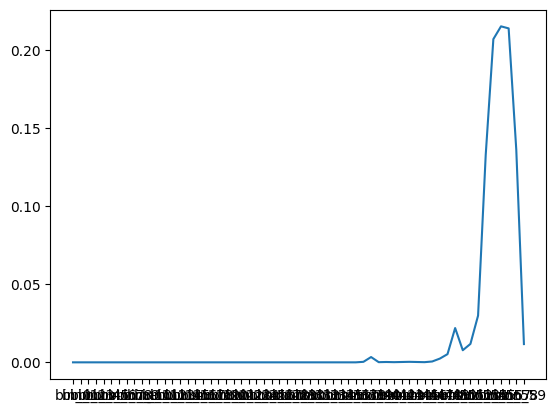

In [20]:
cols = [x for x in df_hist.columns if x.startswith('bin')]
plt.plot(df_hist.iloc[4][cols])

# Anomaly Detection with COSMO method

Implementing the COSMO method according to the pseudocode, and material in slides.



In [21]:
# Initialization

random_state = 42
nn_samples_reference_group = 50
histogram_param = [xx for xx in df_hist.columns if "bin" in xx]

df_hist['date_week'] = df_hist['t'].dt.to_period('W')
week_lst = list(df_hist['date_week'].unique())
T_u = 4 # 4 weeks

df_hist["z_score"] = np.nan
df_hist["anomaly_score"] = np.nan

# Selected metric - Hellinger distance
def hellinger_dist(u, v):
    a = 0.0
    for v1,v2 in zip(np.array(u).flat,np.array(v).flat):
        a += (math.sqrt(v1)-math.sqrt(v2))**2
    return math.sqrt(a/2)

# Computing distance matrix
def compute_distance_matrix(samples):
    def symmetrize(a):
        return a + a.T - np.diag(a.diagonal())
    
    dist_matrix = np.zeros((len(samples), len(samples)))
    
    for ir in range(len(samples)):
        for ic in range(ir, len(samples)):
            dist_matrix[ir, ic] = hellinger_dist(samples[ir], samples[ic])

    return symmetrize(dist_matrix)

# Acquire the most central pattern
def get_mcp(samples):
    dist_matrix = compute_distance_matrix(samples)
    mcp_idx = dist_matrix.sum(axis=1).argmin()
    return samples[mcp_idx], dist_matrix[mcp_idx]


In [ ]:
for iweek, week in enumerate(week_lst):

    # acquire the reference group

    # compute pairwise distance matrix

    # acquire most central pattern

    # compute z-score

In [ ]:
def normcdf(x, mu, sigma):
    t = x-mu
    y = 0.5*math.erfc(-t/(sigma*math.sqrt(2.0)))
    if y>1.0:
        y = 1.0
    return y

def getArithmeticP_val(gMu, n):
    if n == 0:
        return float('NaN')
    amu = 0.5 # mean
    asigma = np.sqrt(1.0/(12.0*n)) # Standard deviation for the mean
    return normcdf(gMu, amu, asigma)

# for each unit, compute the anomaly score based on the z-scores
for i_vid, vid in enumerate(df_hist["id"].unique()):
    
    veh_readings = df_hist[df_hist["id"]==vid].copy().sort_values(by=['t'])
    
    for iweek, week in enumerate(week_lst):

        # compute mean values of the z-score over the period of T_u

        # compute arithmatic p-value

# Anomaly scores and repair events

Let's review anomaly scores and a few repair events.

In [ ]:
events = {
    0: ["2012-07-02", 1],
    4: ["2012-06-04", 0],
    6: ["2012-09-17", 1],
    12: ["2012-03-23", 0],
    13: ["2012-10-18", 1]
}

plt.clf()

for i_vid, vid in enumerate(df_hist["id"].unique()):
    
    veh_readings = df_hist[df_hist["id"]==vid].copy().sort_values(by=['t'])
    
    plt.figure(figsize=(13, 2))
    plt.plot(veh_readings["t"], veh_readings["anomaly_score"])
    plt.ylabel(vid)
    plt.xlim(df_hist["t"].min(), df_hist["t"].max())
    plt.ylim([0, 15])
    
    print(vid, events)
    if vid in events:
        if events[vid][1]:
            plt.axvline(x=pd.to_datetime(events[vid][0]), c="r")
        else:
            plt.axvline(x=pd.to_datetime(events[vid][0]), c="y")

In [ ]:
plt.clf()

for i_vid, vid in enumerate(df_hist["id"].unique()):

    veh_readings = df_hist[df_hist["id"]==vid].copy().sort_values(by=['t'])
    
    plt.figure(figsize=(13, 2))
    plt.scatter(veh_readings["t"], veh_readings["z_score"], s=5, marker="o")
    plt.xlim(df_hist["t"].min(), df_hist["t"].max())
    plt.ylabel(vid)

# Reference

- Fan, Y., Nowaczyk, S., & Rögnvaldsson, T. (2015). Evaluation of self-organized approach for predicting compressor faults in a city bus fleet. Procedia Computer Science, 53, 447-456.

- Fan, Yuantao, Sławomir Nowaczyk, Thorsteinn Rögnvaldsson, and Eric Aislan Antonelo. "Predicting air compressor failures with echo state networks." PHM Society European Conference. Vol. 3. No. 1. 2016.
